This is a simple version of an anomaly detection algorithm. The datasets are taken from Andrew Ng's Coursera course on Machine Learning, week 8. 

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
%matplotlib inline

In [168]:
# Load the data
data1 = scipy.io.loadmat('ex8data1.mat')

In [169]:
# Extract the training data
X = np.array(data1['X'])
y = np.array(data1['yval'])

In [170]:
# Extract the validation data
Xval = np.array(data1["Xval"])
yval = np.array(data1["yval"])

Checking the data, we have 307 training examples and 307 validation examples. The datasets have 2 features.

In [171]:
print(X.shape)
print(y.shape)
print(Xval.shape)
print(yval.shape)

(307, 2)
(307, 1)
(307, 2)
(307, 1)


In [172]:
# Reshape the y variables from (x, 1) to (x,)
y = np.reshape(y, (y.shape[0],))
yval = yval.reshape(yval.shape[0],)

estimateGaussian will calculate the parameters of the Gaussian distribution used for classifying an example as an anomaly or not. Its argument is the training dataset.

multivariateGaussian will compute the probability density function of the distribution. We pass in the parameters of the distribution itself (mu, vector of means and sigma, vector of variances) and the dataset for which we want to calculate the probabilities.

In [173]:
def estimateGaussian(X):
    """
    Estimates the parameters of a Gaussian distribution using the data in X.
    X is a (m x n) dataset.
    The function returns (n x 1) vector mu, the mean of the data set
    and (n x 1) vector sigma2, the variances
    """
    (m, n) = X.shape
    mu = np.zeros((n, 1))
    sigma2 = np.zeros((n, 1))
    mu = np.mean(X, axis = 0)
    sigma2 = np.mean(np.square((X - np.transpose(mu))), axis = 0)
    return (mu, sigma2)

def multivariateGaussian(X, mu, sigma):
    """ 
    Computes the probability density function of the multivariate gaussian distribution.
    X is a (m x n) dataset
    sigma is the variance vector
    mu is the mean vector
    Return the multivariate Gaussian distribution on array pos.
    """
    sigma2 = np.diag(sigma)
    n = mu.shape[0]
    sigma_det = np.linalg.det(sigma2)
    sigma_inv = np.linalg.inv(sigma2)
    X = np.subtract(X, mu)
    N = np.sqrt((2*np.pi)**n * sigma_det)
    fac = np.sum(np.multiply(np.dot(X, sigma_inv), X), axis = 1)
    return np.exp(-fac / 2) / N

Calculate the parameters of the training data (mu, s). Calculate the probabilities of the training (p) and validation (pval) data.

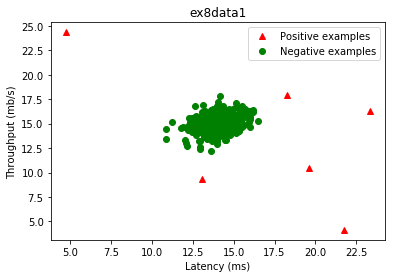

In [174]:
mu, s = estimateGaussian(X)  
p = multivariate_gaussian(X, mu, s)
pval = multivariate_gaussian(Xval, mu, s)

# Plotting the dataset
X_pos = X[y == 1]
X_neg = X[y == 0]
plt.plot(X_pos[:, 0], X_pos[:, 1], 'r^', label = "Positive examples")
plt.plot(X_neg[:, 0], X_neg[:, 1], 'go', label  ="Negative examples")
plt.title("ex8data1")
plt.xlabel('Latency (ms)');
plt.ylabel('Throughput (mb/s)');
plt.legend()
plt.show()



In [175]:
print(X_pos.shape)

(9, 2)


We can see that there are 9 positive examples; ideally the system would pick up all 9, but because 3 are somewhere in the middle of the negative "pile", it's reasonable to expect that the system might have problems with classifying them as positive (they don't differ much compared to other negative examples). However, the 6 clearly visible positive examples should be classified as anomalies.

selectThreshold will try to find the best epsilon based on the results of a validation dataset. The best epsilon in this case is the one that gives the best F1 score on the validation dataset.

In [176]:
def selectThreshold(y, p):
    """
    Find the best epsilon for selecting outliers based on the results from a validation set (p) and the ground truth (y) 
    Calculates the F1 score and chooses the epsilon with the best one.
    """
    bestEpsilon = 0
    bestF1 = 0
    F1 = 0
    for epsilon in np.linspace(np.min(p), np.max(p), 1000):
        pred = p < epsilon
        fp = np.sum((pred == 1) & (y == 0))
        fn = np.sum((pred == 0) & (y == 1))
        tp = np.sum((pred == 1) & (y == 1))
        if fp != 0 and tp != 0:
            prec = tp / (tp + fp)
        else:
            prec = 0
        if fn != 0 and tp != 0:
            recall = tp / (tp + fn)
        else:
            recall = 0
        if prec != 0 and recall != 0:
            F1 = (2*prec*recall)/(prec + recall)
        else:
            F1 = 0
        
        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = epsilon
    return bestEpsilon

In [177]:
epsilon = selectThreshold(yval, pval)
outliers = X[np.where(p < epsilon)]
print(outliers.shape)

(6, 2)


6 examples are classified as anomalies. Plotting the dataset and circling the points we can see that they are exactly the scattered, "different" ones mentioned earlier.

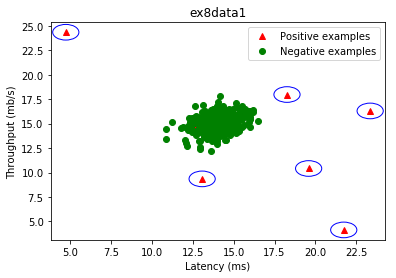

In [178]:
ax = plt.gca()
X_pos = X[y == 1]
X_neg = X[y == 0]
ax.plot(X_pos[:, 0], X_pos[:, 1], 'r^', label = "Positive examples")
ax.plot(X_neg[:, 0], X_neg[:, 1], 'go', label  ="Negative examples")
plt.title("ex8data1")
plt.xlabel('Latency (ms)');
plt.ylabel('Throughput (mb/s)');
for point in outliers:
    c = plt.Circle((point[0], point[1]), 0.8, color='b', fill=False)
    ax.add_artist(c)
plt.legend()
plt.show()

ex8data2 is a higher dimensional dataset that will be both more realistic and much harder.

In [179]:
# Using the second dataset
data2 = scipy.io.loadmat('ex8data2.mat')

In [180]:
# Training data
X = np.array(data2['X'])
y = np.array(data2["yval"])

In [181]:
# Validation data
Xval = np.array(data2["Xval"])
yval = np.array(data2["yval"])

In [182]:
print(X.shape)
print(y.shape)
print(Xval.shape)
print(yval.shape)

(1000, 11)
(100, 1)
(100, 11)
(100, 1)


We have 1000 training examples and 100 validation examples. The datasets have 11 features.

In [183]:
# Reshape the y variables from (x, 1) to (x,)
yval = yval.reshape(yval.shape[0],)
y = np.reshape(y, (y.shape[0],))

Calculate the parameters of the training data (mu, s). Calculate the probabilities of the training (p) and validation (pval) data.

In [184]:
mu, s = estimateGaussian(X)
p = multivariate_gaussian(X, mu, s)
pval = multivariate_gaussian(Xval, mu, s)

In [185]:
epsilon= selectThreshold(yval, pval)
outliers = X[np.where(p < epsilon)]
print(outliers.shape)


(117, 11)


The system classified 117 points as anomalies.